# **<center><span style="color:#f6a6b2;font-family:cursive;font-size:125%;border-bottom: 3px solid">Import Libraries & Loading Data</span></center>**

---

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [2]:
data = pd.read_csv("/kaggle/input/customer-personality-analysis/marketing_campaign.csv", sep="\t")

In [3]:
df = data.copy()

# **<center><span style="color:#f6a6b2;font-family:cursive;font-size:125%;border-bottom: 3px solid">Looking & Cleaning Data</span></center>**
----

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.shape

(2240, 29)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0000,5592.1598,3246.6622,0.0000,2828.2500,5458.5000,8427.7500,11191.0000
Year_Birth,2240.0000,1968.8058,11.9841,1893.0000,1959.0000,1970.0000,1977.0000,1996.0000
Income,2216.0000,52247.2514,25173.0767,1730.0000,35303.0000,51381.5000,68522.0000,666666.0000
Kidhome,2240.0000,0.4442,0.5384,0.0000,0.0000,0.0000,1.0000,2.0000
Teenhome,2240.0000,0.5062,0.5445,0.0000,0.0000,0.0000,1.0000,2.0000
Recency,2240.0000,49.1094,28.9625,0.0000,24.0000,49.0000,74.0000,99.0000
MntWines,2240.0000,303.9357,336.5974,0.0000,23.7500,173.5000,504.2500,1493.0000
MntFruits,2240.0000,26.3022,39.7734,0.0000,1.0000,8.0000,33.0000,199.0000
MntMeatProducts,2240.0000,166.9500,225.7154,0.0000,16.0000,67.0000,232.0000,1725.0000
MntFishProducts,2240.0000,37.5254,54.6290,0.0000,3.0000,12.0000,50.0000,259.0000


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Features: </font></h3>
    
**People (Customer Information)**
    
1. **ID**: Unique identifier of the customer.
1. **Year_Birth**: Birth year of the customer.
1. **Education**: Education level of the customer.
1. **Marital_Status**: Marital status of the customer.
1. **Income**: Yearly household income of the customer.
1. **Kidhome**: Number of children in the customer's household.
1. **Teenhome**: Number of teenagers in the customer's household.
1. **Dt_Customer**: Date of customer's enrollment with the company.
1. **Recency**: Number of days since the customer's last purchase.
1. **Complain**: 1 if the customer complained in the last 2 years, 0 otherwise.
    
**Products (Product Information)**
    
1. **MntWines**: Amount spent on wine in the last 2 years.
1. **MntFruits**: Amount spent on fruits in the last 2 years.
1. **MntMeatProducts**: Amount spent on meat in the last 2 years.
1. **MntFishProducts**: Amount spent on fish in the last 2 years.
1. **MntSweetProducts**: Amount spent on sweets in the last 2 years.
1. **MntGoldProds**: Amount spent on gold in the last 2 years.
    
**Promotion (Promotional Information)**
    
1. **NumDealsPurchases**: Number of purchases made with a discount.
1. **AcceptedCmp1**: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise.
1. **AcceptedCmp2**: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise.
1. **AcceptedCmp3**: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise.
1. **AcceptedCmp4**: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise.
1. **AcceptedCmp5**: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise.
1. **Response**: 1 if the customer accepted the offer in the last campaign, 0 otherwise.
    
**Place (Purchase Location Information)**
    
1. **NumWebPurchases**: Number of purchases made through the company’s website.
1. **NumCatalogPurchases**: Number of purchases made using a catalogue.
1. **NumStorePurchases**: Number of purchases made directly in stores.
1. **NumWebVisitsMonth**: Number of visits to the company’s website in the last month.

In [7]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0000,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0000,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0000,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0000,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0000,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0000,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0000,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0000,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0000,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0000,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [8]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
df.duplicated().sum()

0

# **<center><span style="color:#f6a6b2;font-family:cursive;font-size:125%;border-bottom: 3px solid">EDA</span></center>**
---

* **Step - 1**

In [10]:
df['Income'] = df['Income'].fillna(df['Income'].median())

In [11]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

* **Step - 2**

In [12]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")

In [13]:
df['Dt_Customer'].max()

Timestamp('2014-06-29 00:00:00')

In [14]:
df['Dt_Customer'].min()

Timestamp('2012-07-30 00:00:00')

In [15]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0000,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0000,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0000,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0000,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0000,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


* **Step - 3**

In [16]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [17]:
df = df.drop(columns = ["Z_CostContact", "Z_Revenue"],axis=1)

* **Step - 4**

In [18]:
df["monetary"] = df.loc[:,df.columns.str.contains("Mnt")].sum(axis=1)

In [19]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,monetary
0,5524,1957,Graduation,Single,58138.0000,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617
1,2174,1954,Graduation,Single,46344.0000,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27
2,4141,1965,Graduation,Together,71613.0000,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776
3,6182,1984,Graduation,Together,26646.0000,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53
4,5324,1981,PhD,Married,58293.0000,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422


* **Step - 5**

In [20]:
df["frequency"] = df.loc[:,df.columns.str.contains("Purchases")].sum(axis=1)

In [21]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,monetary,frequency
0,5524,1957,Graduation,Single,58138.0000,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,25
1,2174,1954,Graduation,Single,46344.0000,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,6
2,4141,1965,Graduation,Together,71613.0000,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,21
3,6182,1984,Graduation,Together,26646.0000,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,8
4,5324,1981,PhD,Married,58293.0000,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,19


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Steps what we did: </font></h3>

1. We replaced missing values in the "Income" column with median values.
2. We changed the data type of the 'Dt_Customer' column to 'datetime'.
3. We removed the "Z_CostContact" and "Z_Revenue" columns as they contained the same value in all rows, rendering the data meaningless.
4. We aggregated the data from various columns related to the amount spent and consolidated it into a new column called "monetary."
5. We combined the data from multiple columns related to transaction amounts and created a new column named "frequency."

# **<center><span style="color:#f6a6b2;font-family:cursive;font-size:125%;border-bottom: 3px solid">RFM Analysis</span></center>**
----

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 RFM Metrics: </font></h3>
    
1. **Recency**: refers to the newness of the customer. (Date of analysis - Date of last purchase by the customer)
1. **Frequency**: is the total purchase value made by the customer.
1. **Monetary**: It is the total money left by the customer as a result of the total purchases he made.

In [22]:
rfm = df[["ID","Recency","frequency","monetary"]]

In [23]:
rfm.head()

,ID,Recency,frequency,monetary
0,5524,58,25,1617
1,2174,38,6,27
2,4141,26,21,776
3,6182,26,8,53
4,5324,94,19,422


In [24]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0000,5592.1598,3246.6622,0.0000,2828.2500,5458.5000,8427.7500,11191.0000
Recency,2240.0000,49.1094,28.9625,0.0000,24.0000,49.0000,74.0000,99.0000
frequency,2240.0000,14.8621,7.6772,0.0000,8.0000,15.0000,21.0000,44.0000
monetary,2240.0000,605.7982,602.2493,5.0000,68.7500,396.0000,1045.5000,2525.0000


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Notes: </font></h3>
    
* As evident, both 'recency' and 'frequency' have minimum values of zero. Nevertheless, these metrics should not have zero values, necessitating the need for adjustments.

In [25]:
rfm = rfm[rfm["frequency"] > 0]
rfm = rfm[rfm["Recency"] > 0]

In [26]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2208.0000,5590.3822,3238.7851,0.0000,2834.7500,5468.0000,8416.5000,11191.0000
Recency,2208.0000,49.7115,28.6108,1.0000,25.0000,50.0000,74.0000,99.0000
frequency,2208.0000,14.8863,7.6548,1.0000,8.0000,15.0000,21.0000,44.0000
monetary,2208.0000,608.8596,604.0864,8.0000,68.0000,397.5000,1048.2500,2525.0000


In [27]:
rfm.shape

(2208, 4)

In [28]:
rfm["recency_score"] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])

In [29]:
rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

In [30]:
rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

In [31]:
rfm.head()

,ID,Recency,frequency,monetary,recency_score,frequency_score,monetary_score
0,5524,58,25,1617,3,5,5
1,2174,38,6,27,4,1,1
2,4141,26,21,776,4,4,4
3,6182,26,8,53,4,2,1
4,5324,94,19,422,1,4,3


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Notes: </font></h3>
    
* The priority order for metric importance in RFM Score calculation is as follows: frequency > recency > monetary. Consequently, we only need to consider 'recency' and 'frequency' in our analysis

In [32]:
rfm["RFM_SCORE"] = (rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str))

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Explanations of Segments:</font></h3>
    
1. **About_to_sleep** : Encourage customers in this segment to re-engage by implementing stimulating campaigns. Special offers, discounts, or loyalty programs could be utilized to regain their interest.
2. **At_risk** : Since customers in this segment are at risk of attrition, special offers or discounts can be provided to win them back. Additionally, personalized services can be offered to enhance customer satisfaction.
3.**Cant_loose** : Customers in this segment may have demonstrated loyalty. Thus, you can strengthen their loyalty by offering loyalty programs or special privileges to reward them for their commitment.
4. **Champions** : Customer loyalty is high in this segment. Retain their loyalty by offering special deals or loyalty programs. Additionally, consider their feedback to improve your products or services.
5. **Hibernating** : Implement stimulating campaigns to regain the interest of customers in this segment. Strategies such as sending personalized offers or reminders could be utilized.
6. **Loyal_customers** : Customers in this segment exhibit high loyalty. Offer them exclusive deals or privileges to strengthen their commitment. Additionally, gather their recommendations and feedback to enhance service quality.
7. **Need_attention** : Attract the attention of customers in this segment by providing personalized offers or services. Ensuring excellent customer support is vital to enhance customer satisfaction.
8. **New_customers** : Welcome these customers with welcome offers or discounts to establish their loyalty. Additionally, gather their feedback to improve your products or services.
9. **Potential_loyalist** : Offer personalized deals or exclusive privileges to enhance the loyalty of customers in this segment. Regular interaction is crucial to increase brand awareness.
10. **Promising** : Attract the interest of customers in this segment by implementing special offers or campaigns. Providing a good customer experience is essential to enhance customer satisfaction.

# **<center><span style="color:#f7c297;font-family:cursive;font-size:100%"> -RFM Table- </span></center>**
<center> <img src=https://i.imgur.com/MYgXofm.png> <img> </center>

In [33]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [34]:
rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)

In [35]:
rfm.head()

,ID,Recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
0,5524,58,25,1617,3,5,5,35,loyal_customers
1,2174,38,6,27,4,1,1,41,promising
2,4141,26,21,776,4,4,4,44,loyal_customers
3,6182,26,8,53,4,2,1,42,potential_loyalists
4,5324,94,19,422,1,4,3,14,at_Risk


In [36]:
rfm[["segment", "Recency", "frequency", "monetary"]].groupby("segment").agg(["mean", "count"])

Recency       frequency        monetary      
                       mean count      mean count      mean count
segment                                                          
about_to_sleep      50.1190   168    6.9345   168   79.1607   168
at_Risk             78.6676   373   17.3807   373  868.4236   373
cant_loose          79.8193   166   25.8133   166 1212.9036   166
champions           10.0181   166   22.8855   166 1094.1506   166
hibernating         80.1458   343    7.0729   343   84.3061   343
loyal_customers     40.2978   356   23.0112   356 1109.4466   356
need_attention      50.5526    76   14.7500    76  579.8026    76
new_customers       10.3626    91    4.9451    91   42.0549    91
potential_loyalists 20.1147   375   11.9307   375  397.5200   375
promising           31.0957    94    5.0426    94   35.4043    94

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Inferences: </font></h3>
    
* **Let's examine some segments;**
    
    1. When we examine the 'Champions' segment, we can clearly see why it holds the highest value for us. This group exhibits the lowest 'Recency' value, signifying that they are our most recent and highly active shoppers. Furthermore, their high 'frequency' values further underline their significance as our most valuable customers.
    1. Let's now take a closer look at the 'can't lose' segment as another group. On average, their 'Recency' values are relatively low. However, what sets this segment apart is its remarkable revenue generation, driven by exceptionally high 'frequency' values.

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Why is this segmentation important?: </font></h3>
    
1. **Customer Understanding:** RFM segmentation helps companies gain a deeper understanding of their customer base. It allows businesses to categorize customers into different segments based on their recent purchase history, purchase frequency, and monetary value. This segmentation provides insights into customer behavior and preferences.
2. **Targeted Marketing:** RFM segments enable companies to create targeted marketing campaigns. By identifying high-value customers, at-risk customers, or loyal customers, companies can tailor their marketing efforts to specific customer groups. This leads to more effective and efficient marketing campaigns.
3. **Customer Retention:** RFM analysis helps in customer retention. By identifying and focusing on at-risk or lapsed customers (low recency and frequency), companies can implement strategies to re-engage these customers and prevent them from churning.
4. **Cross-Selling and Up-Selling:** Companies can use RFM segments to identify cross-selling and up-selling opportunities. For example, they can recommend complementary products to high-value customers to increase their monetary value.

# **<center><span style="color:#f6a6b2;font-family:cursive;font-size:125%;border-bottom: 3px solid">Customer Life Time Value Prediction (CLTV)</span></center>**
----

In [37]:
!pip install lifetimes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.0 MB/s eta 0:00:00


In [38]:
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions
from sklearn.preprocessing import MinMaxScaler

**Data Preparing**

In [39]:
df = data.copy()

In [40]:
df['Income'] = df['Income'].fillna(df['Income'].median())

In [41]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")

In [42]:
df["last_order_date"] = dt.datetime(2014, 10, 4) - pd.to_timedelta(df["Recency"], unit='D')

In [43]:
df["monetary"] = df.loc[:,df.columns.str.contains("Mnt")].sum(axis=1)

In [44]:
df["frequency"] = df.loc[:,df.columns.str.contains("Purchases")].sum(axis=1)

In [45]:
cltv = pd.DataFrame()
cltv["Recency_weekly"] = (df["last_order_date"] - df["Dt_Customer"]).dt.days // 7
cltv["T_weekly"] = (dt.datetime(2014,10, 4) - df["Dt_Customer"]).dt.days // 7
cltv["frequency"] = df["frequency"]
cltv["monetary"] = df["monetary"]
cltv["monetary"] = round(cltv["monetary"] / cltv["frequency"])
cltv.index = df["ID"]

In [46]:
cltv.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency_weekly,2240.0000,56.9371,29.0635,0.0000,32.0000,57.0000,82.0000,113.0000
T_weekly,2240.0000,63.9442,28.8969,13.0000,39.0000,64.0000,89.0000,113.0000
frequency,2240.0000,14.8621,7.6772,0.0000,8.0000,15.0000,21.0000,44.0000
monetary,2240.0000,inf,NaN,1.0000,10.0000,23.0000,46.0000,inf


**Outlier Detection & Cleaning**

In [47]:
def outlier_thresholds(dataframe, variable):
    
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    
    return low_limit, up_limit

In [48]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit 
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [49]:
replace_with_thresholds(cltv,"Recency_weekly")
replace_with_thresholds(cltv,"T_weekly")
replace_with_thresholds(cltv,"frequency")
replace_with_thresholds(cltv,"monetary")

---

In [50]:
cltv.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency_weekly,2240.0000,56.9371,29.0635,0.0000,32.0000,57.0000,82.0000,113.0000
T_weekly,2240.0000,63.9442,28.8969,13.0000,39.0000,64.0000,89.0000,113.0000
frequency,2240.0000,14.8594,7.6677,0.0000,8.0000,15.0000,21.0000,40.5000
monetary,2240.0000,32.2112,27.1221,1.0000,10.0000,23.0000,46.0000,100.0000


In [51]:
cltv = cltv[cltv["frequency"] > 1]

In [52]:
cltv["frequency"] = round(cltv["frequency"])

In [53]:
cltv.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency_weekly,2232.0000,56.9350,29.0651,0.0000,32.0000,57.0000,82.0000,113.0000
T_weekly,2232.0000,63.9413,28.8958,13.0000,39.0000,64.0000,89.0000,113.0000
frequency,2232.0000,14.9104,7.6314,2.0000,8.0000,15.0000,21.0000,40.0000
monetary,2232.0000,31.9987,26.9032,1.0000,10.0000,23.0000,45.0000,100.0000


**Visualization**

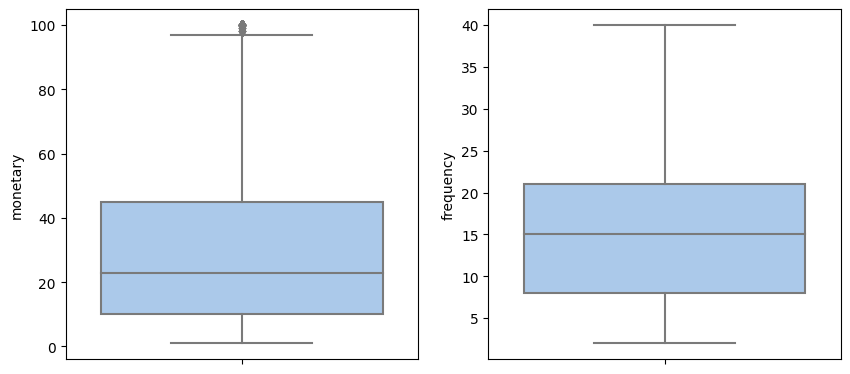

In [54]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(y="monetary", data=cltv,palette="pastel");
plt.subplot(2,2,2)
sns.boxplot(y="frequency", data=cltv,palette="pastel");

**BG-NBD Modelling**

In [55]:
bgf = BetaGeoFitter(penalizer_coef=0.001)

In [56]:
bgf.fit(cltv['frequency'],
        cltv['Recency_weekly'],
        cltv['T_weekly'])

<lifetimes.BetaGeoFitter: fitted with 2232 subjects, a: 0.08, alpha: 5.07, b: 4.38, r: 1.67>

**BG-NBD Prediction**

In [57]:
cltv["expected_purc_3_month"] = bgf.predict(4 * 3,cltv['frequency'],
                                            cltv['Recency_weekly'],
                                            cltv['T_weekly']).sum()

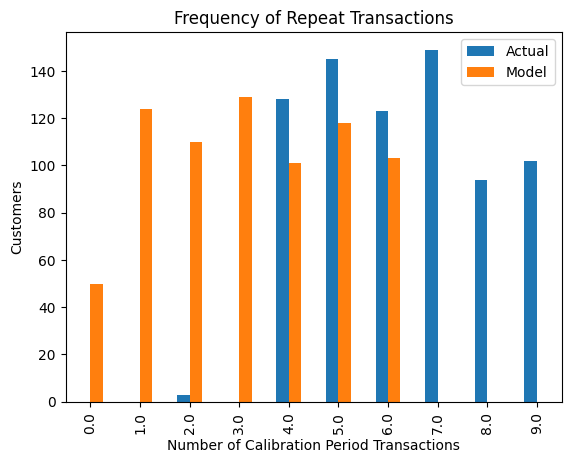

In [58]:
plot_period_transactions(bgf)
plt.show()

**GAMMA-GAMMA Modelling**

In [59]:
ggf = GammaGammaFitter(penalizer_coef=0.01)

In [60]:
ggf.fit(cltv['frequency'], cltv['monetary'])

<lifetimes.GammaGammaFitter: fitted with 2232 subjects, p: 3.09, q: 0.85, v: 3.06>

In [61]:
cltv["expected_average_profit"] = ggf.conditional_expected_average_profit(cltv['frequency'],
                                                                          cltv['monetary'])

In [62]:
cltv.sort_values("expected_average_profit", ascending=False).head(10)

,Recency_weekly,T_weekly,frequency,monetary,expected_purc_3_month,expected_average_profit
ID,,,,,,
4246,42,42,2.0000,100.0000,5997.9226,104.1117
3422,86,96,10.0000,100.0000,5997.9226,100.8059
10479,86,95,11.0000,100.0000,5997.9226,100.7323
7959,15,18,11.0000,100.0000,5997.9226,100.7323
10513,79,88,12.0000,100.0000,5997.9226,100.6710
7962,51,51,12.0000,100.0000,5997.9226,100.6710
9606,48,57,13.0000,100.0000,5997.9226,100.6192
2532,17,31,13.0000,100.0000,5997.9226,100.6192
1173,71,81,13.0000,100.0000,5997.9226,100.6192


**BG/NBD & GG Modeling**

In [63]:
cltv = ggf.customer_lifetime_value(bgf,
                                   cltv['frequency'],
                                   cltv['Recency_weekly'],
                                   cltv['T_weekly'],
                                   cltv['monetary'],
                                   time=3,  # 3 aylık
                                   freq="W",  # T'nin frekans bilgisi.
                                   discount_rate=0.01)

In [64]:
cltv.head()

ID
5524   191.9449
2174    12.1225
4141   167.3083
6182    23.4833
5324    13.3999
Name: clv, dtype: float64

In [65]:
cltv = cltv.reset_index()

In [66]:
cltv.head()

,ID,clv
0,5524,191.9449
1,2174,12.1225
2,4141,167.3083
3,6182,23.4833
4,5324,13.3999


**Segmentation**

In [67]:
cltv["segment"] = pd.qcut(cltv["clv"], 4, labels=["D", "C", "B", "A"])

In [68]:
cltv.groupby("segment").agg({"clv": ["count", "mean", "sum"]})

clv                     
        count     mean         sum
segment                           
D         558   9.1101   5083.4541
C         558  32.4291  18095.4428
B         558 104.2772  58186.6778
A         558 279.5215 155973.0238

<div style="border-radius:10px; border:#D0C2F0 solid; padding: 15px; background-color: #FFF0F4; font-size:100%; text-align:left">

<h3 align="left"><font color='#5E5273'>📄 Report</font></h3>
    
* The results clearly show that customers in segments A and B generate significantly higher revenue. Therefore, allocating a substantial portion of the company's advertising and marketing budget to these groups is likely to lead to the most substantial increase in the company's medium to long-term revenues.